In [ ]:
#__________________________ Applied Statistics 2024/2025 _________________________

#### 2.1.Linear Models with heteroscedastic and independent errors: ARMD Trial ####
#_________________________________________________________________________________#

In [1]:
# Topic:
# Linear Models with heteroscedastic and independent errors (theory: Chapter 7)
# in R: Chapters 8 and 9 for ARMD Trial dataset

# Set the directory!

In [ ]:
#_________________________________________________________________________________________#
#### Fitting Linear Models with Heterogeneous Variance (& independent residual errors) ####
#_________________________________________________________________________________________#

In [ ]:
library(nlme)  # for the models
library(nlmeU) # for the data
library(lattice)
library(corrplot)
library(plot.matrix)

In [3]:
# (Chapter 8.4)
# gls() function allows the inclusion of heteroscedasticity (and dependency, next lab)

# gls(model, 
#     data, 
#     subset,                           # optional
#     na.action,                        # optional
#     weights = varFunc(form=formula),  # Focus of this lab
#     control = glsControl()            # a list of control values to replace the default ones
                                        # e.g., for changing number of iterations, ...              
# )

# control
args(glsControl)
?glsControl

function (maxIter = 50L, msMaxIter = 200L, tolerance = 1e-06, 
    msTol = 1e-07, msVerbose = FALSE, singular.ok = FALSE, returnObject = FALSE, 
    apVar = TRUE, .relStep = .Machine$double.eps^(1/3), opt = c("nlminb", 
        "optim"), optimMethod = "BFGS", minAbsParApVar = 0.05, 
    natural = TRUE, sigma = NULL) 
NULL

glsControl                package:nlme                 R Documentation

_C_o_n_t_r_o_l _V_a_l_u_e_s _f_o_r _g_l_s _F_i_t

_D_e_s_c_r_i_p_t_i_o_n:

     The values supplied in the function call replace the defaults and
     a list with all possible arguments is returned. The returned list
     is used as the 'control' argument to the 'gls' function.

_U_s_a_g_e:

     glsControl(maxIter, msMaxIter, tolerance, msTol, msVerbose,
                singular.ok, returnObject = FALSE, apVar, .relStep,
                opt = c("nlminb", "optim"), optimMethod,
                minAbsParApVar, natural, sigma = NULL)
     
_A_r_g_u_m_e_n_t_s:

 maxIter: maximum number of iterations for the 'gls' optimization
          algorithm. Default is 50.

msMaxIter: maximum number of iterations for the 'opt'imization step
          inside the 'gls' optimization. Default is 50.

tolerance: tolerance for the convergence criterion in the 'gls'
          algorithm. Def

In [4]:
# weights
# NB. The default value of the weights argument is NULL --> LM with homoscedastic residual errors
# weights can be given directly as a one-sided formula

In [5]:
# varFunc Class (Chapter 8.2)
?varClasses

#_varClass___________parameters___________________Group #########################################
# varFixed()         value                        known weights
# varIdent()         value, form, fixed           <delta>-group
# varExp()           value, form, fixed           <delta>-group, <delta,mu>-group, <mu>-group
# varPower()         value, form, fixed           <delta>-group, <delta,mu>-group, <mu>-group
# varConstPower()    const, power, form, fixed    <delta>-group, <delta,mu>-group, <mu>-group

varClasses                package:nlme                 R Documentation

_V_a_r_i_a_n_c_e _F_u_n_c_t_i_o_n _C_l_a_s_s_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     Standard classes of variance function structures ('varFunc')
     available in the 'nlme' package. Covariates included in the
     variance function, denoted by variance covariates, may involve
     functions of the fitted model object, such as the fitted values
     and the residuals. Different coefficients may be assigned to the
     levels of a classification factor.

_V_a_l_u_e:

     Available standard classes:

  varExp: exponential of a variance covariate.

varPower: power of a variance covariate.

varConstPower: constant plus power of a variance covariate.

varConstProp: constant plus proportion of a variance covariate.

varIdent: constant variance(s), generally used to allow different
          variances according to the levels of a classification factor.

varFixed: fixed weights, determin

In [7]:
# what gls() returns
?glsObject   

# Extracting results directly from the object gls.fit = gls(...)
#_Model-fit component____________Syntax_________________________
# gls()-call                     (cl <- getCall(gls.fit))
# weights argument               cl$weights
# 95% CI for delta intervals     (gls.fit, which="var-cov")$varStruct
# Pearson residuals              resid(gls.fit, type="pearson")
# Var-cov structure              gls.fit$modelStruct
# Variance function              gls.fit$modelStruct$varStruct

glsObject                 package:nlme                 R Documentation

_F_i_t_t_e_d _g_l_s _O_b_j_e_c_t

_D_e_s_c_r_i_p_t_i_o_n:

     An object returned by the 'gls' function, inheriting from class
     '"gls"' and representing a generalized least squares fitted linear
     model. Objects of this class have methods for the generic
     functions 'anova', 'coef', 'fitted', 'formula', 'getGroups',
     'getResponse', 'intervals', 'logLik', 'plot', 'predict', 'print',
     'residuals', 'summary', and 'update'.

_V_a_l_u_e:

     The following components must be included in a legitimate '"gls"'
     object.

   apVar: an approximate covariance matrix for the variance-covariance
          coefficients. If 'apVar = FALSE' in the list of control
          values used in the call to 'gls', this component is equal to
          'NULL'.

    call: a list containing an image of the 'gls' call that produced
          the object.

coefficients: a vector with the esti

In [8]:
?gls()  # see method 

gls                    package:nlme                    R Documentation

_F_i_t _L_i_n_e_a_r _M_o_d_e_l _U_s_i_n_g _G_e_n_e_r_a_l_i_z_e_d _L_e_a_s_t _S_q_u_a_r_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     This function fits a linear model using generalized least squares.
     The errors are allowed to be correlated and/or have unequal
     variances.

_U_s_a_g_e:

     gls(model, data, correlation, weights, subset, method, na.action,
         control, verbose)
     ## S3 method for class 'gls'
     update(object, model., ..., evaluate = TRUE)
     
_A_r_g_u_m_e_n_t_s:

  object: an object inheriting from class '"gls"', representing a
          generalized least squares fitted linear model.

   model: a two-sided linear formula object describing the model, with
          the response on the left of a '~' operator and the terms,
          separated by '+' operators, on the right.

  model.: Changes to the model - see 'update.formula

In [9]:
#_________________________________________________________________________________________#
#### ARMD Trial application (Chapter 9) : independent, heteroscedastic residual errors ####
#_________________________________________________________________________________________#
# heterogeneous variance, keeping assumption of independence

In [10]:
data(armd, package = "nlmeU")

In [15]:
# MODEL FORMULATION
# VISUAL_it = b_0t + b_1 * VISUAL0_i + b_2t * TREAT_i + eps_it
# eps_it~N(0,sigma_t^2), for t=1(4wks), 2(12wks), 3(24wks), 4(52wks)

# sqrt(Var(VISUAL_it)) = sigma_t where sigma_1=sigma_2=sigma_3=sigma_4
# so it means that it's the same as our previous lab: eps_it~N(0,sigma^2)

lm1.form <- visual ~ -1 + visual0 + time.f + treat.f:time.f   # model defined last time
fm6.1 <- gls(lm1.form, data = armd)
summary(fm6.1)

# with the command of last time we get the same result!
# fm6.1_lm <- lm(lm1.form, data = armd)
# summary(fm6.1_lm)

Generalized least squares fit by REML
  Model: lm1.form 
  Data: armd 
      AIC      BIC   logLik
  6821.62 6869.166 -3400.81

Coefficients:
                              Value Std.Error   t-value p-value
visual0                    0.830372 0.0284243 29.213483  0.0000
time.f4wks                 8.075314 1.9434077  4.155234  0.0000
time.f12wks                7.080657 1.9406595  3.648583  0.0003
time.f24wks                3.630216 1.9531644  1.858633  0.0634
time.f52wks               -1.746430 1.9895174 -0.877816  0.3803
time.f4wks:treat.fActive  -2.352776 1.6289409 -1.444359  0.1490
time.f12wks:treat.fActive -3.708522 1.6437809 -2.256093  0.0243
time.f24wks:treat.fActive -3.449153 1.6939909 -2.036111  0.0420
time.f52wks:treat.fActive -4.473453 1.7781123 -2.515844  0.0121

 Correlation: 
                          visul0 tm.f4w tm.f12 tm.f24 tm.f52 t.4:.A t.12:.
time.f4wks                -0.808                                          
time.f12wks               -0.808  0.653             

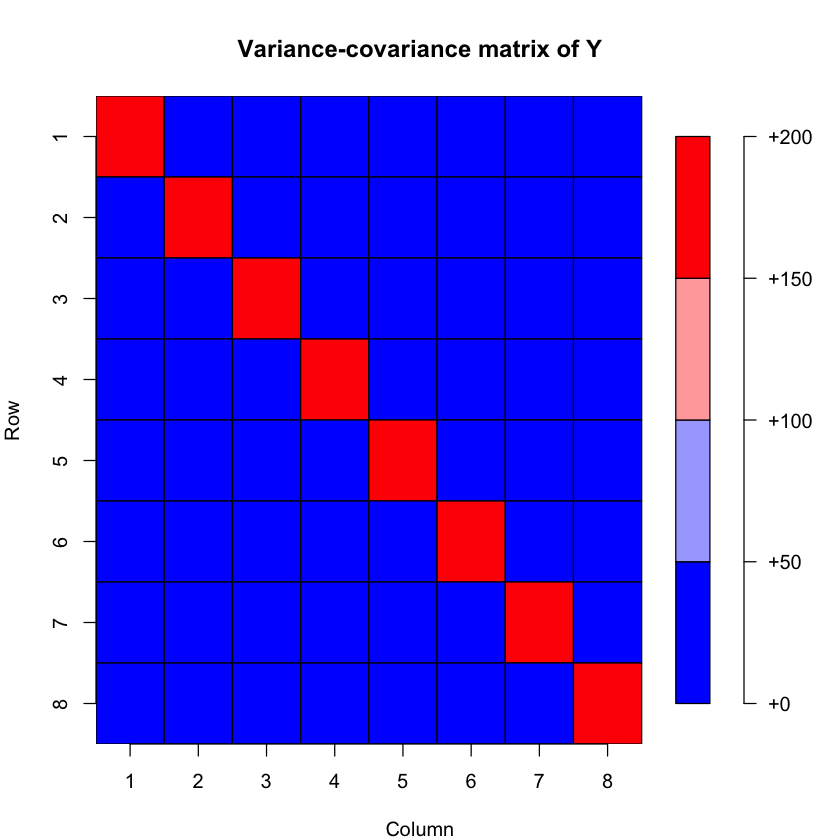

In [16]:
# Visualization of Variance-covariance matrix of Y (first 8 observations)
par(mar = c(4,4,4,4), bg = 'white')
plot(diag(x=12.38^2, nrow=8, ncol=8), 
     col=colorRampPalette(c("blue", "white", "red")), 
     main='Variance-covariance matrix of Y')

In [17]:
##### varFixed() #####
?varFixed

varFixed                 package:nlme                  R Documentation

_F_i_x_e_d _V_a_r_i_a_n_c_e _F_u_n_c_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     This function is a constructor for the 'varFixed' class,
     representing a variance function with fixed variances. Letting v
     denote the variance covariate defined in 'value', the variance
     function s2(v) for this class is s2(v)=|v|. The variance covariate
     v is evaluated once at initialization and remains fixed
     thereafter. No coefficients are required to represent this
     variance function.

_U_s_a_g_e:

     varFixed(value)
     
_A_r_g_u_m_e_n_t_s:

   value: a one-sided formula of the form '~ v' specifying a variance
          covariate 'v'. Grouping factors are ignored.

_V_a_l_u_e:

     a 'varFixed' object representing a fixed variance function
     structure, also inheriting from class 'varFunc'.

_A_u_t_h_o_r(_s):

     Jos<c3><a9> Pinheiro and Douglas B

In [18]:
###### model 9.0: lambda_i are known, i.e. lambda(v) ######

# we suppose that the variance is proportional to the time
# eps_it~N(0,sigma_t^2), for t=1(4wks),2(12wks),3(24wks),4(52wks)

#                                  {sigma*sqrt(4)   for t=1(4wks),
# sqrt(Var(VISUAL_it)) = sigma_t = {sigma*sqrt(12)  for t=2(12wks),
#                                  {sigma*sqrt(24)  for t=3(24wks),
#                                  {sigma*sqrt(52)  for t=4(52wks).

fm9.0 <- gls(visual ~ -1 + visual0 + time.f + treat.f:time.f, 
             method = 'REML',                   # default
             weights = varFixed(value = ~time), # Var.function; lambda_i(v_i) (v_i is known and observable)
             data = armd)
# NB. the variance covariate needs to be continuous: if we put time.f, it doesn't work!
# Try to change between 'REML' and 'ML' and see that results are different!
summary(fm9.0)

Generalized least squares fit by REML
  Model: visual ~ -1 + visual0 + time.f + treat.f:time.f 
  Data: armd 
       AIC      BIC    logLik
  6823.385 6870.931 -3401.692

Variance function:
 Structure: fixed weights
 Formula: ~time 

Coefficients:
                              Value Std.Error  t-value p-value
visual0                    0.885772  0.023041 38.44389  0.0000
time.f4wks                 5.013667  1.405890  3.56619  0.0004
time.f12wks                4.025640  1.637002  2.45915  0.0141
time.f24wks                0.581269  1.958030  0.29686  0.7666
time.f52wks               -4.827693  2.605103 -1.85317  0.0642
time.f4wks:treat.fActive  -2.306024  0.848519 -2.71770  0.0067
time.f12wks:treat.fActive -3.675795  1.482824 -2.47891  0.0134
time.f24wks:treat.fActive -3.421104  2.161060 -1.58307  0.1138
time.f52wks:treat.fActive -4.415768  3.338654 -1.32262  0.1863

 Correlation: 
                          visul0 tm.f4w tm.f12 tm.f24 tm.f52 t.4:.A t.12:.
time.f4wks                -0.90

In [19]:
alpha = 0.05
intervals(fm9.0, which="coef", level = 1 - alpha)    # 1 - alpha/length(lm9.0$coefficients) if Bonferroni correction
intervals(fm6.1, which="coef", level = 1 - alpha)    # they are different!

intervals(fm9.0, which="var-cov", level = 1 - alpha)
intervals(fm6.1, which="var-cov", level = 1 - alpha) 

Approximate 95% confidence intervals

 Coefficients:
                                lower       est.      upper
visual0                     0.8405492  0.8857719  0.9309945
time.f4wks                  2.2542813  5.0136672  7.7730530
time.f12wks                 0.8126434  4.0256399  7.2386363
time.f24wks                -3.2618198  0.5812693  4.4243585
time.f52wks                -9.9408137 -4.8276928  0.2854280
time.f4wks:treat.fActive   -3.9714410 -2.3060243 -0.6406075
time.f12wks:treat.fActive  -6.5861821 -3.6757946 -0.7654071
time.f24wks:treat.fActive  -7.6626874 -3.4211043  0.8204789
time.f52wks:treat.fActive -10.9686525 -4.4157677  2.1371171

Approximate 95% confidence intervals

 Coefficients:
                               lower       est.      upper
visual0                    0.7745832  0.8303725  0.8861617
time.f4wks                 4.2609239  8.0753138 11.8897036
time.f12wks                3.2716615  7.0806575 10.8896534
time.f24wks               -0.2033236  3.6302160  7.4637556
time.f52wks               -5.6513208 -1.7464298  2.1584611
time.f4wks:treat.fActive  -5.5499518 -2.3527761  0.8443996
time.f12wks:treat.fActive -6.9348245 -3.7085220 -0.4822195
time.f24wks:treat.fActive -6.7740045 -3.4491532 -0.1243018
time.f52wks:treat.fActive -7.9634126 -4.4734534 -0.9834943

Approximate 95% confidence intervals

 Residual standard error:
   lower     est.    upper 
3.077444 3.222976 3.383063 

Approximate 95% confidence intervals

 Residual standard error:
   lower     est.    upper 
11.81764 12.37649 12.99124 

In [20]:
anova(fm6.1, fm9.0) # we can compare the models to see which one is better (lower AIC)

,call,Model,df,AIC,BIC,logLik
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
fm6.1,"gls(model = lm1.form, data = armd)",1,10,6821.620,6869.166,-3400.810
fm9.0,"gls(model = visual ~ -1 + visual0 + time.f + treat.f:time.f, data = armd, weights = varFixed(value = ~time), method = ""REML"")",2,10,6823.385,6870.931,-3401.692


To determine which model is better in this comparison, we look at AIC (Akaike Information Criterion), BIC (Bayesian Information Criterion), and logLik (log-likelihood):

Key Metrics in the Table:
	1.	AIC (Akaike Information Criterion):
	•	Lower AIC is better because it indicates a better trade-off between model fit and complexity.
	•	fm6.1 (AIC = 6821.620) is slightly better than fm9.0 (AIC = 6823.385) because it has a lower AIC.
	2.	BIC (Bayesian Information Criterion):
	•	Like AIC, lower BIC is better, but it penalizes model complexity more heavily.
	•	fm6.1 (BIC = 6869.166) is also better than fm9.0 (BIC = 6870.931).
	3.	logLik (Log-Likelihood):
	•	Higher log-likelihood indicates a better fit to the data.
	•	fm6.1 (logLik = -3400.810) has a slightly better log-likelihood than fm9.0 (logLik = -3401.692).

Conclusion:

Model fm6.1 is better because it has:
	•	Lower AIC
	•	Lower BIC
	•	Slightly higher log-likelihood

This means fm6.1 balances model fit and complexity more effectively than fm9.0.

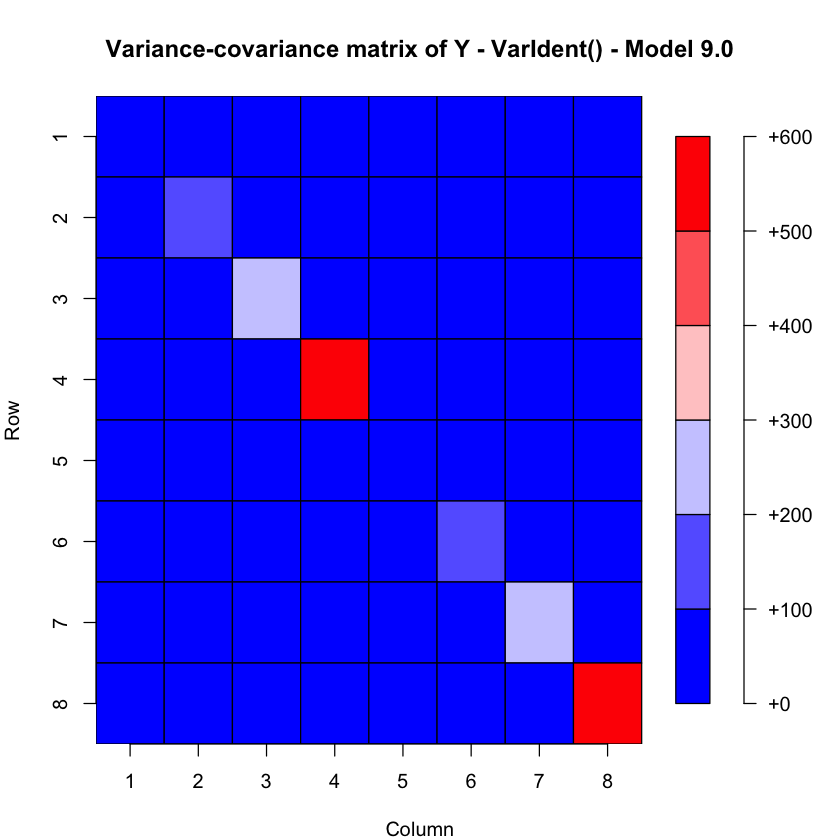

In [22]:
# Visualization of variance-covariance matrix of Y (8 observations, 2 patients)
par(mar = c(4,4,4,4), bg = 'white')
plot(diag(x=c( 4 * 3.222976^2, # v_i * sigma^2
              12 * 3.222976^2, 
              24 * 3.222976^2, 
              52 * 3.222976^2), nrow=8, ncol=8),
     col=colorRampPalette(c("blue", "white", "red")),
     main='Variance-covariance matrix of Y - VarIdent() - Model 9.0')

In [28]:
# another example
# we suppose that the variance is proportional to 1/visual0 
fm9.0b <- gls( lm1.form, 
               weights = varFixed(value = ~I(1/visual0)), 
               data = armd)

summary(fm9.0b)

Generalized least squares fit by REML
  Model: lm1.form 
  Data: armd 
       AIC      BIC    logLik
  6875.903 6923.449 -3427.952

Variance function:
 Structure: fixed weights
 Formula: ~I(1/visual0) 

Coefficients:
                              Value Std.Error   t-value p-value
visual0                    0.858164 0.0311317 27.565650  0.0000
time.f4wks                 6.806802 2.1778397  3.125483  0.0018
time.f12wks                5.517936 2.1741108  2.538020  0.0113
time.f24wks                1.991011 2.1870707  0.910355  0.3629
time.f52wks               -4.117272 2.2204045 -1.854289  0.0640
time.f4wks:treat.fActive  -2.424978 1.6467572 -1.472578  0.1412
time.f12wks:treat.fActive -3.542282 1.6615692 -2.131890  0.0333
time.f24wks:treat.fActive -3.499935 1.7135244 -2.042536  0.0414
time.f52wks:treat.fActive -4.051488 1.7940860 -2.258246  0.0242

 Correlation: 
                          visul0 tm.f4w tm.f12 tm.f24 tm.f52 t.4:.A t.12:.
time.f4wks                -0.849                    

In [26]:
anova(fm6.1, fm9.0, fm9.0b)

,call,Model,df,AIC,BIC,logLik
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
fm6.1,"gls(model = lm1.form, data = armd)",1,10,6821.620,6869.166,-3400.810
fm9.0,"gls(model = visual ~ -1 + visual0 + time.f + treat.f:time.f, data = armd, weights = varFixed(value = ~time), method = ""REML"")",2,10,6823.385,6870.931,-3401.692
fm9.0b,"gls(model = lm1.form, data = armd, weights = varFixed(value = ~I(1/visual0)))",3,10,6875.903,6923.449,-3427.952


In [31]:
##### varIdent() #####

###### model 9.1 ######
# <delta>-group i.e. lambda(delta,v)
# eps_it~N(0,sigma_t^2), for t=1(4wks),2(12wks),3(24wks),4(52wks)

#                                  {sigma*delta_1  for t=1(4wks),
# sqrt(Var(VISUAL_it)) = sigma_t = {sigma*delta_2  for t=2(12wks),
#                                  {sigma*delta_3  for t=3(24wks),
#                                  {sigma*delta_4  for t=4(52wks).

# delta_1 = 1
# delta_2 = sigma_2/sigma_1
# delta_3 = sigma_3/sigma_1
# delta_4 = sigma_4/sigma_1


lm1.form <- formula(visual ~ -1 + visual0 + time.f + treat.f:time.f)
fm9.1 <- gls(lm1.form,                  
         weights = varIdent(form = ~ 1|time.f), # Var.function; <delta>-group i.e. lambda(delta,v)
         data = armd)
# see ?varIdent for better understanding 'form':
# form ~ v, or ~ v | g, specifying a variance covariate v and, optionally, a grouping factor g for the coefficients.
# The variance covariate is ignored in this variance function.
# Defaults to ~ 1

summary(fm9.1)

Generalized least squares fit by REML
  Model: lm1.form 
  Data: armd 
       AIC      BIC    logLik
  6740.294 6802.104 -3357.147

Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | time.f 
 Parameter estimates:
    4wks    12wks    24wks    52wks 
1.000000 1.397599 1.664321 1.880852 

Coefficients:
                              Value Std.Error  t-value p-value
visual0                    0.862986  0.025444 33.91713  0.0000
time.f4wks                 6.272900  1.599432  3.92195  0.0001
time.f12wks                5.282147  1.761645  2.99842  0.0028
time.f24wks                1.835279  1.908354  0.96171  0.3365
time.f52wks               -3.560391  2.071846 -1.71846  0.0861
time.f4wks:treat.fActive  -2.325253  1.085147 -2.14280  0.0324
time.f12wks:treat.fActive -3.689255  1.530278 -2.41084  0.0161
time.f24wks:treat.fActive -3.432641  1.877967 -1.82785  0.0679
time.f52wks:treat.fActive -4.439493  2.227561 -1.99298  0.0466

 Correlation: 
               

In [32]:
fm9.1$modelStruct$varStruct             # delta1=1, delta_2 = sigma_2/sigma_1, ... 
# estimated values of the delta variance-function coefficients. 
# The estimates indicate an increasing variability of visual acuity measurements in time. 

Variance function structure of class varIdent representing
    4wks    12wks    24wks    52wks 
1.000000 1.397599 1.664321 1.880852 

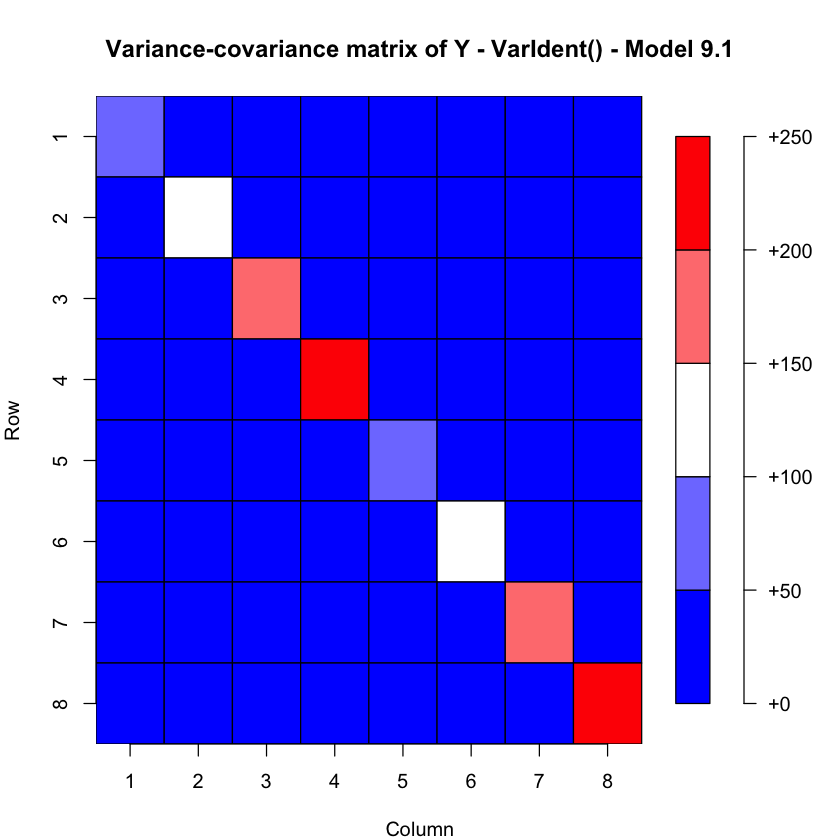

In [34]:
# Visualization of variance-covariance matrix of Y (8 observations, 2 patients)
par(mar = c(4,4,4,4), bg='white')
plot(diag(x=c(1.000000^2 * 8.244094^2, # delta_t^2 * sigma^2
              1.397600^2 * 8.244094^2, 
              1.664321^2 * 8.244094^2, 
              1.880852^2 * 8.244094^2), nrow=8, ncol=8),
     col=colorRampPalette(c("blue", "white", "red")),
     main='Variance-covariance matrix of Y - VarIdent() - Model 9.1')

Approximate 95% confidence intervals

 Variance function:
         lower     est.    upper
12wks 1.226560 1.397599 1.592490
24wks 1.457349 1.664321 1.900686
52wks 1.640746 1.880852 2.156095

 Residual standard error:
   lower     est.    upper 
7.518225 8.244095 9.040046 

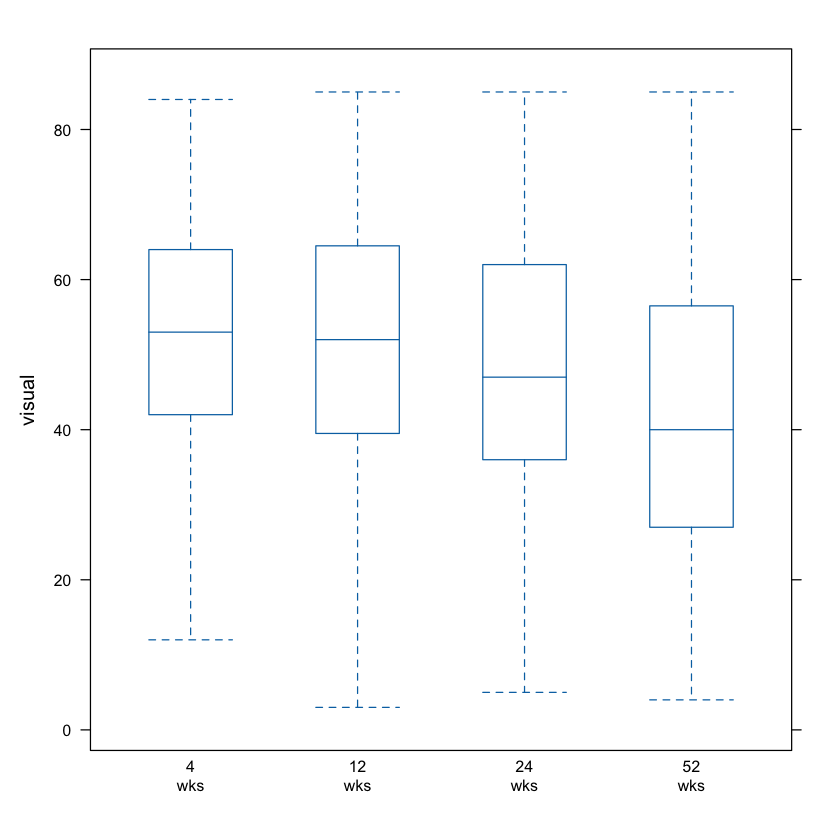

In [35]:
# This is consistent with the results of exploratory analysis, e.g.:
bw1 <- bwplot(visual ~ time.f, data = armd)  
xlims <- c("4\nwks", "12\nwks", "24\nwks", "52\nwks")
update(bw1, xlim = xlims, pch = "|")

(intervals(fm9.1, which = "var-cov"))   # 95% CI for delta2,3,4 & sigma (see book 7.6.2)
# The standard deviation at week 4 is estimated to be equal to 8.24. 

# Comments:
# The 95% confidence intervals for the variance function coefficients slightly overlap, 
# but suggest timepoint-specific variances.

In [36]:
###### Comparison between the models ######

# To formally test the hypothesis that the variances are timepoint specific:
# --> Likelihood Ratio (LR) test statistic, based on the likelihood 
# for model fm6.1, which assumed homoscedasticity, and
# that for model fm9.1, which assumes heteroscedasticity. 

# Both models differ only by their variance structure and were fitted using the gls() function
# with the default estimation method (REML). 
# Moreover, model fm6.1 is nested within fm9.1, 
# because the former can be obtained from the latter by specifying 
# sigma_1^2 = sigma_2^2 = sigma_3^2 = sigma_4^2

# Thus, we can use the LR test to test the null hypothesis of homoscedasticity (fm6.1)
anova(fm6.1, fm9.1)                     # fm6.1 nested in fm9.1
# pval < 0.0001 --> there is enough proof against the assumption H0 
# --> data provide evidence for heterogeneous variances of visual acuity measurements at != timepoints

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
fm6.1,"gls(model = lm1.form, data = armd)",1,10,6821.620,6869.166,-3400.810,,NA,NA
fm9.1,"gls(model = lm1.form, data = armd, weights = varIdent(form = ~1 | time.f))",2,13,6740.294,6802.104,-3357.147,1 vs 2,87.32618,8.217946e-19


In [40]:
##### varPower() ######

###### model 9.2 (REML estimation) ######
# <delta>-group i.e. lambda(delta,v)
# delta scalar, no strata 
# sigma_it = sigma * lambda_it 
#          = sigma * lambda(delta, TIME_it) 
#          = sigma * |TIME_it|^delta            
fm9.2 <- update(fm9.1,                    
          weights = varPower(form = ~time))           # <delta>-group 
# NB. continuous-time variable "time" rather than to the factor "time.f"
#     if you set time.f, there would be an error

summary(fm9.2)

Generalized least squares fit by REML
  Model: lm1.form 
  Data: armd 
       AIC      BIC    logLik
  6738.126 6790.427 -3358.063

Variance function:
 Structure: Power of variance covariate
 Formula: ~time 
 Parameter estimates:
    power 
0.2519332 

Coefficients:
                              Value Std.Error  t-value p-value
visual0                    0.862917  0.025564 33.75523  0.0000
time.f4wks                 6.276734  1.615396  3.88557  0.0001
time.f12wks                5.285972  1.747721  3.02449  0.0026
time.f24wks                1.839097  1.886872  0.97468  0.3300
time.f52wks               -3.556533  2.123940 -1.67450  0.0944
time.f4wks:treat.fActive  -2.325312  1.115198 -2.08511  0.0374
time.f12wks:treat.fActive -3.689296  1.484085 -2.48591  0.0131
time.f24wks:treat.fActive -3.432676  1.821213 -1.88483  0.0598
time.f52wks:treat.fActive -4.439566  2.322625 -1.91144  0.0563

 Correlation: 
                          visul0 tm.f4w tm.f12 tm.f24 tm.f52 t.4:.A t.12:.
time.f4wks  

In [41]:
#?varPower # read form to better understand
fm9.2$modelStruct$varStruct                          # our delta is estimated      

Variance function structure of class varPower representing
    power 
0.2519332 

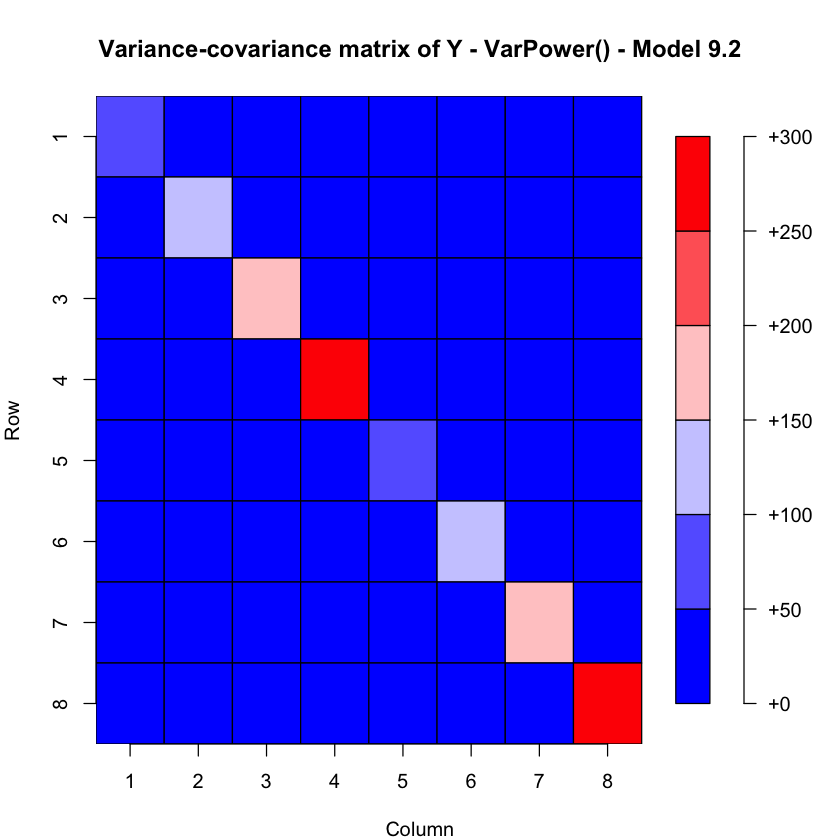

In [42]:
# Visualization of Variance-covariance matrix of Y (8 observations - 2 subjects)
par(mar = c(4,4,4,4))
plot(diag(x=c( 4^(2*0.2519332) * 5.974906^2, # TIME_it^{2*delta} * sigma^2
              12^(2*0.2519332) * 5.974906^2, 
              24^(2*0.2519332) * 5.974906^2, 
              52^(2*0.2519332) * 5.974906^2), nrow=8, ncol=8),
     col=colorRampPalette(c("blue", "white", "red")),
     main='Variance-covariance matrix of Y - VarPower() - Model 9.2')

In [43]:
###### Comparison between the models ######
anova(fm9.2, fm9.1)                        # fm9.2 nested in fm9.1: fm9.1 is more general
# Can a common-power variance function be used as a more parsimonious representation 
# of the variance structure of the data?
# we are testing 
# H0: sigma_1^2 = 4^delta  * sigma^2, 
#     sigma_2^2 = 12^delta * sigma^2, 
#     sigma_3^2 = 24^delta * sigma^2, 
#     sigma_4^2 = 52^delta * sigma^2
# vs
# H1: sigma_1^2 != 4^delta  * sigma^2, 
#     sigma_2^2 != 12^delta * sigma^2, 
#     sigma_3^2 != 24^delta * sigma^2, 
#     sigma_4^2 != 52^delta * sigma^2
#     (fm9.1)
# pval = 0.4 --> there is not enough proof/support against the assumption H0 
# --> fm9.2 is not statistically significantly worse than the fit of model fm9.1. 
# --> fm9.2, which specifies that the variance is a power function of the time (in weeks), 
#            offers an adequate description of the variance structure of the data.

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
fm9.2,"gls(model = lm1.form, data = armd, weights = varPower(form = ~time))",1,11,6738.126,6790.427,-3358.063,,NA,NA
fm9.1,"gls(model = lm1.form, data = armd, weights = varIdent(form = ~1 | time.f))",2,13,6740.294,6802.104,-3357.147,1 vs 2,1.831985,0.4001192


In [44]:
###### model 9.3 (REML estimation) ######
# <delta>-group i.e. lambda(delta,v)
# delta = [delta_1, delta_2], strata = treatment group 

# sigma_it = sigma * lambda_it 
#          = sigma * lambda(delta, TIME_it) 
#          = {sigma * |TIME_it|^delta_1    ACTIVE
#            {sigma * |TIME_it|^delta_2    PLACEBO

fm9.3 <- update(fm9.1,                            
          weights = varPower(form = ~time|treat.f))   # <delta>-group
                                                      # strata=treat.f  
# NB. continuous-time variable "time" rather than to the factor "time.f"

fm9.3$modelStruct$varStruct
coef(fm9.3$modelStruct$varStruct)   # same, for getting coefficients

summary(fm9.3)
summary(fm9.3)$sigma

Variance function structure of class varPower representing
   Active   Placebo 
0.2532485 0.2511255 

Active   Placebo 
0.2532485 0.2511255

Generalized least squares fit by REML
  Model: lm1.form 
  Data: armd 
       AIC      BIC    logLik
  6740.111 6797.166 -3358.055

Variance function:
 Structure: Power of variance covariate, different strata
 Formula: ~time | treat.f 
 Parameter estimates:
   Active   Placebo 
0.2532485 0.2511255 

Coefficients:
                              Value Std.Error  t-value p-value
visual0                    0.862887 0.0255597 33.75967  0.0000
time.f4wks                 6.278405 1.6145559  3.88863  0.0001
time.f12wks                5.287639 1.7459711  3.02848  0.0025
time.f24wks                1.840761 1.8840893  0.97700  0.3288
time.f52wks               -3.554852 2.1194035 -1.67729  0.0939
time.f4wks:treat.fActive  -2.325337 1.1149965 -2.08551  0.0373
time.f12wks:treat.fActive -3.689314 1.4843305 -2.48551  0.0131
time.f24wks:treat.fActive -3.432691 1.8219823 -1.88404  0.0599
time.f52wks:treat.fActive -4.439597 2.3244596 -1.90995  0.0565

 Correlation: 
                          visul0 tm.f4w

[1] 5.971599

In [45]:
varWeights(fm9.3$modelStruct$varStruct)  # Variance weights: 1/^lambda_i
# inverse of the standard deviations corresponding to the variance function structure 
# for each observation in the dataset

Active    Active    Active    Active    Active    Active   Placebo   Placebo 
0.7039295 0.5329653 0.7039295 0.5329653 0.4471606 0.3676416 0.7060043 0.5357843 
  Placebo   Placebo   Placebo   Placebo   Placebo    Active    Active    Active 
0.4501878 0.7060043 0.5357843 0.4501878 0.3707385 0.7039295 0.5329653 0.4471606 
   Active   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo 
0.3676416 0.7060043 0.5357843 0.4501878 0.3707385 0.7060043 0.5357843 0.4501878 
  Placebo    Active    Active    Active    Active   Placebo   Placebo   Placebo 
0.3707385 0.7039295 0.5329653 0.4471606 0.3676416 0.7060043 0.5357843 0.4501878 
   Active    Active    Active    Active    Active    Active    Active    Active 
0.7039295 0.7039295 0.5329653 0.4471606 0.3676416 0.7039295 0.5329653 0.4471606 
   Active   Placebo   Placebo   Placebo   Placebo    Active    Active    Active 
0.3676416 0.7060043 0.5357843 0.4501878 0.3707385 0.7039295 0.5329653 0.4471606 
   Active   Placebo   Placebo   Placebo   Placebo    Active    Active    Active 
0.3676416 0.7060043 0.5357843 0.4501878 0.3707385 0.7039295 0.5329653 0.4471606 
   Active   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo 
0.3676416 0.7060043 0.5357843 0.4501878 0.3707385 0.7060043 0.5357843 0.4501878 
  Placebo    Active    Active    Active    Active    Active    Active    Active 
0.3707385 0.7039295 0.5329653 0.4471606 0.3676416 0.7039295 0.5329653 0.4471606 
   Active    Active    Active    Active    Active    Active    Active    Active 
0.3676416 0.7039295 0.5329653 0.4471606 0.3676416 0.7039295 0.5329653 0.4471606 
   Active   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo 
0.3676416 0.7060043 0.5357843 0.4501878 0.3707385 0.7060043 0.5357843 0.4501878 
  Placebo    Active    Active    Active    Active   Placebo   Placebo   Placebo 
0.3707385 0.7039295 0.5329653 0.4471606 0.3676416 0.7060043 0.5357843 0.4501878 
  Placebo   Placebo    Active    Active    Active    Active   Placebo   Placebo 
0.3707385 0.7060043 0.7039295 0.7039295 0.5329653 0.4471606 0.7060043 0.5357843 
  Placebo   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo 
0.4501878 0.3707385 0.7060043 0.5357843 0.4501878 0.3707385 0.7060043 0.5357843 
  Placebo   Placebo    Active    Active    Active    Active   Placebo   Placebo 
0.4501878 0.3707385 0.7039295 0.5329653 0.4471606 0.3676416 0.7060043 0.5357843 
  Placebo    Active    Active    Active   Placebo   Placebo   Placebo   Placebo 
0.4501878 0.7039295 0.5329653 0.4471606 0.7060043 0.5357843 0.4501878 0.3707385 
   Active    Active    Active    Active    Active    Active   Placebo   Placebo 
0.7039295 0.5329653 0.4471606 0.3676416 0.7039295 0.5329653 0.7060043 0.5357843 
  Placebo   Placebo   Placebo   Placebo   Placebo   Placebo    Active    Active 
0.4501878 0.3707385 0.7060043 0.5357843 0.4501878 0.3707385 0.7039295 0.5329653 
   Active    Active   Placebo   Placebo   Placebo   Placebo   Placebo   Placebo 
0.4471606 0.3676416 0.7060043 0.5357843 0.4501878 0.3707385 0.7060043 0.5357843 
  Placebo   Placebo    Active    Active    Active    Active    Active    Active 
0.4501878 0.3707385 0.7039295 0.5329653 0.4471606 0.7039295 0.5329653 0.4471606 
   Active   Placebo   Placebo   Placebo    Active    Active    Active    Active 
0.3676416 0.7060043 0.5357843 0.3707385 0.7039295 0.5329653 0.4471606 0.3676416 
   Active    Active    Active    Active   Placebo   Placebo   Placebo   Placebo 
0.7039295 0.5329653 0.4471606 0.3676416 0.7060043 0.5357843 0.4501878 0.3707385 
   Active    Active    Active    Active   Placebo   Placebo   Placebo   Placebo 
0.7039295 0.5329653 0.4471606 0.3676416 0.7060043 0.5357843 0.4501878 0.3707385 
   Active    Active    Active   Placebo   Placebo   Placebo   Placebo   Placebo 
0.7039295 0.5329653 0.4471606 0.7060043 0.5357843 0.4501878 0.3707385 0.7060043 
  Placebo   Placebo   Placebo    Active    Active    Active    Active   Placebo 
0.5357843 0.4501878 0.3707385 0.70

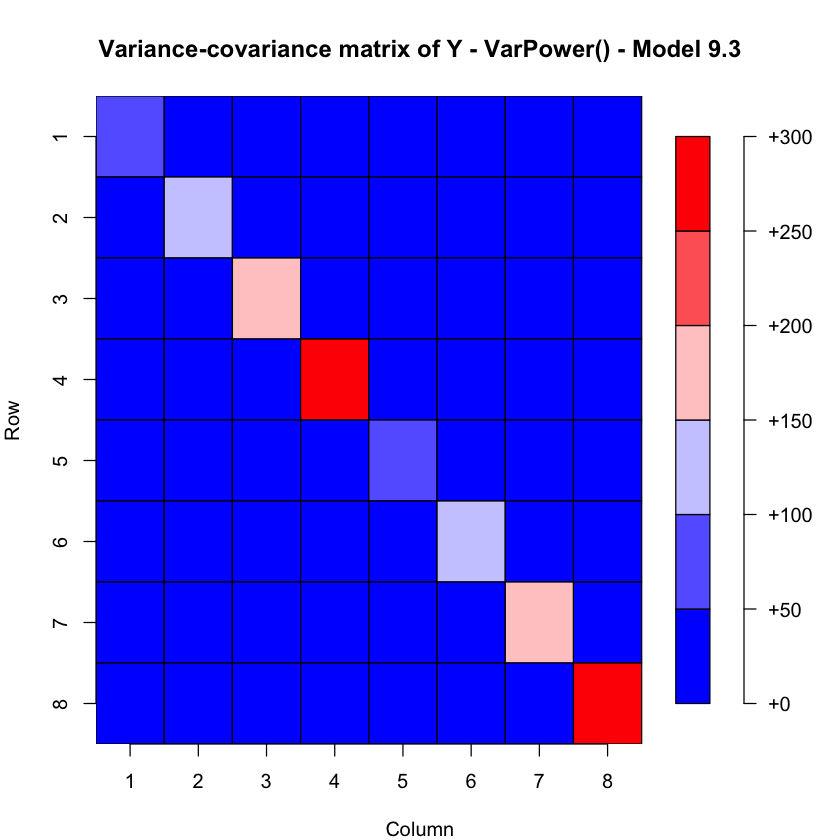

In [46]:
# Visualization of Variance-covariance matrix of Y (8 random observations, 2 patients, one active, one placebo)
par(mar = c(4,4,4,4))
plot(diag(x=c(  4^(2*0.2532485) * 5.971599^2,  # ACTIVE - 4      # TIME_it^{2*delta_1} * sigma^2
               12^(2*0.2532485) * 5.971599^2,  # ACTIVE - 12
               24^(2*0.2532485) * 5.971599^2,  # ACTIVE - 24
               52^(2*0.2532485) * 5.971599^2,  # ACTIVE - 52
                4^(2*0.2511255) * 5.971599^2,  # PLACEBO - 4
               12^(2*0.2511255) * 5.971599^2,  # PLACEBO - 12
               24^(2*0.2511255) * 5.971599^2,  # PLACEBO - 24
               52^(2*0.2511255) * 5.971599^2), nrow=8, ncol=8), # PLACEBO - 52
     col=colorRampPalette(c("blue", "white", "red")),
     main='Variance-covariance matrix of Y - VarPower() - Model 9.3')

In [47]:
###### Comparison between the models ######
# Likelihood Ratio (LR) tests
anova(fm9.2, fm9.3)                        # fm9.2 nested in fm9.3
# we are testing 
# H0: delta_1=delta_2 (fm9.2)
# vs 
# H1: delta_1!=delta_2 (fm9.3)
# pval = 0.9 --> there is not enough proof/support against the assumption H0 (fm9.2)
# --> a common-power variance function of the TIME covariate can be used for both treatment groups.


,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
fm9.2,"gls(model = lm1.form, data = armd, weights = varPower(form = ~time))",1,11,6738.126,6790.427,-3358.063,,NA,NA
fm9.3,"gls(model = lm1.form, data = armd, weights = varPower(form = ~time | treat.f))",2,12,6740.111,6797.166,-3358.055,1 vs 2,0.0155286,0.9008293


In [48]:
###### model 9.4 (REML-based GLS) ######
# <delta,mu>-group i.e. lambda(delta,mu,v)
# delta = scalar, no strata 
# sigma_it = sigma * lambda_it 
#          = sigma * lambda(delta, mu_it) 
#          = sigma * |mu_it|^delta      where mu_it = b_0t + b1 * VISUAL0_i + b_2t * TREAT_i
#                                             predicted mean value of VISUAL_it

fm9.4 <- update(fm9.1, weights = varPower())                # <delta,mu>-group
# NB. equivalent to varPower(form=~fitted(.)), which means that the fitted values mu_i are used
# see ?varPower() for more details
fm9.4$modelStruct$varStruct

summary(fm9.4)

Variance function structure of class varPower representing
      power 
-0.05885881 

Generalized least squares fit by REML
  Model: lm1.form 
  Data: armd 
       AIC      BIC    logLik
  6823.102 6875.402 -3400.551

Variance function:
 Structure: Power of variance covariate
 Formula: ~fitted(.) 
 Parameter estimates:
      power 
-0.05885881 

Coefficients:
                              Value Std.Error   t-value p-value
visual0                    0.834800 0.0286445 29.143426  0.0000
time.f4wks                 7.867355 1.9583277  4.017384  0.0001
time.f12wks                6.836781 1.9564898  3.494412  0.0005
time.f24wks                3.383507 1.9726466  1.715212  0.0867
time.f52wks               -2.108402 2.0157469 -1.045966  0.2959
time.f4wks:treat.fActive  -2.356437 1.6193705 -1.455156  0.1460
time.f12wks:treat.fActive -3.685145 1.6376446 -2.250272  0.0247
time.f24wks:treat.fActive -3.461970 1.6950104 -2.042448  0.0414
time.f52wks:treat.fActive -4.425400 1.7945624 -2.466005  0.0139

 Correlation: 
                          visul0 tm.f4w tm.f12 tm.f24 tm.f52 t.4:.A 

       2        3        5        6        7        8       10       11 
150.1197 150.8999 148.5810 149.2871 150.3081 152.5696 155.2079 155.6708 


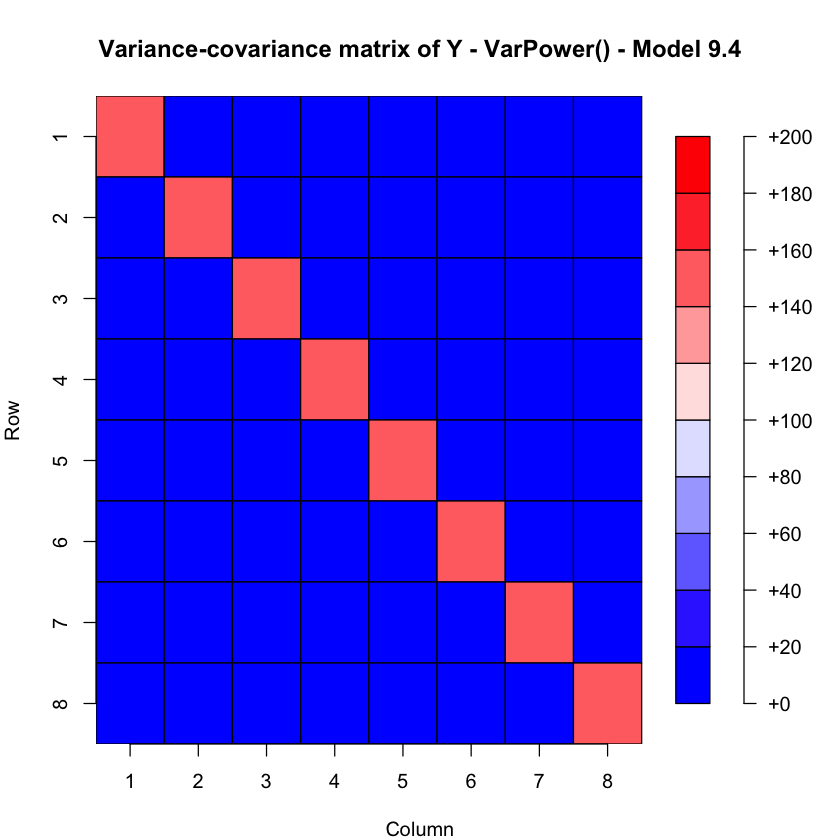

In [49]:
# Visualization of Variance-covariance matrix of Y (first 8 observations)
par(mar = c(4,4,4,4))
plot(diag(x=15.50761^2 * fitted(fm9.4)[1:8]^(-0.05885895*2), nrow=8, ncol=8),
     col=colorRampPalette(c("blue", "white", "red"))(10),
     main='Variance-covariance matrix of Y - VarPower() - Model 9.4')
# they are slightly different!
print(15.50761^2 * fitted(fm9.4)[1:8]^(-0.05885895*2))


In [53]:
###### Comparison between the models ######
# NOTICE. between the two best models fm9.4 and fm9.2, 
# we cannot use anova() (LRtest) since they are not nested!

In [54]:
###### model 9.5 (REML-based IRLS) ######
# <mu>-group i.e. lambda(mu,v)
# delta = 1, no strata 
# sigma_it = sigma * lambda_it 
#          = sigma * lambda(mu_it) 
#          = sigma * mu_it               
# NB. the scale parameter can be interpreted as a coefficient of variation, 
# constant for all timepoints.
fm9.5 <- update(fm9.1,                             
         weights = varPower(fixed = 1))              # <mu>-group
# NB. fixed=1 implies that, in the absence of any stratifying variable, 
# the power coefficient delta is fixed at 1.
# NB. as before, equivalent to varPower(form=~fitted(.)), 
# which means that the fitted values mu_i are used

fm9.5$modelStruct$varStruct
summary(fm9.5)

Variance function structure of class varPower representing
power 
    1 

Generalized least squares fit by REML
  Model: lm1.form 
  Data: armd 
       AIC      BIC    logLik
  6965.943 7013.489 -3472.971

Variance function:
 Structure: Power of variance covariate
 Formula: ~fitted(.) 
 Parameter estimates:
power 
    1 

Coefficients:
                              Value Std.Error   t-value p-value
visual0                    0.761684 0.0263756 28.878305  0.0000
time.f4wks                10.788518 1.8052537  5.976179  0.0000
time.f12wks               10.617630 1.7995553  5.900141  0.0000
time.f24wks                7.002255 1.7204676  4.069972  0.0001
time.f52wks                3.922977 1.6726635  2.345347  0.0192
time.f4wks:treat.fActive  -2.437349 1.7790004 -1.370067  0.1710
time.f12wks:treat.fActive -4.352260 1.7444463 -2.494924  0.0128
time.f24wks:treat.fActive -3.107859 1.6670055 -1.864336  0.0626
time.f52wks:treat.fActive -5.525886 1.5431079 -3.581010  0.0004

 Correlation: 
                          visul0 tm.f4w tm.f12 tm.f24 tm.f52 t.4:.A t.12:.
time.

,subject,treat.f,visual0,miss.pat,time.f,time,visual,tp
,<fct>,<fct>,<int>,<fct>,<ord>,<dbl>,<int>,<dbl>
2,1,Active,59,--XX,4wks,4,55,1
3,1,Active,59,--XX,12wks,12,45,2
5,2,Active,65,----,4wks,4,70,1
6,2,Active,65,----,12wks,12,65,2
7,2,Active,65,----,24wks,24,65,3
8,2,Active,65,----,52wks,52,55,4
10,3,Placebo,40,---X,4wks,4,40,1
11,3,Placebo,40,---X,12wks,12,37,2
12,3,Placebo,40,---X,24wks,24,17,3


       2        3        5        6        7        8       10       11 
249.5846 228.5432 297.3271 274.3189 244.3207 189.5726 141.6676 134.6788 
      12 
112.5493 


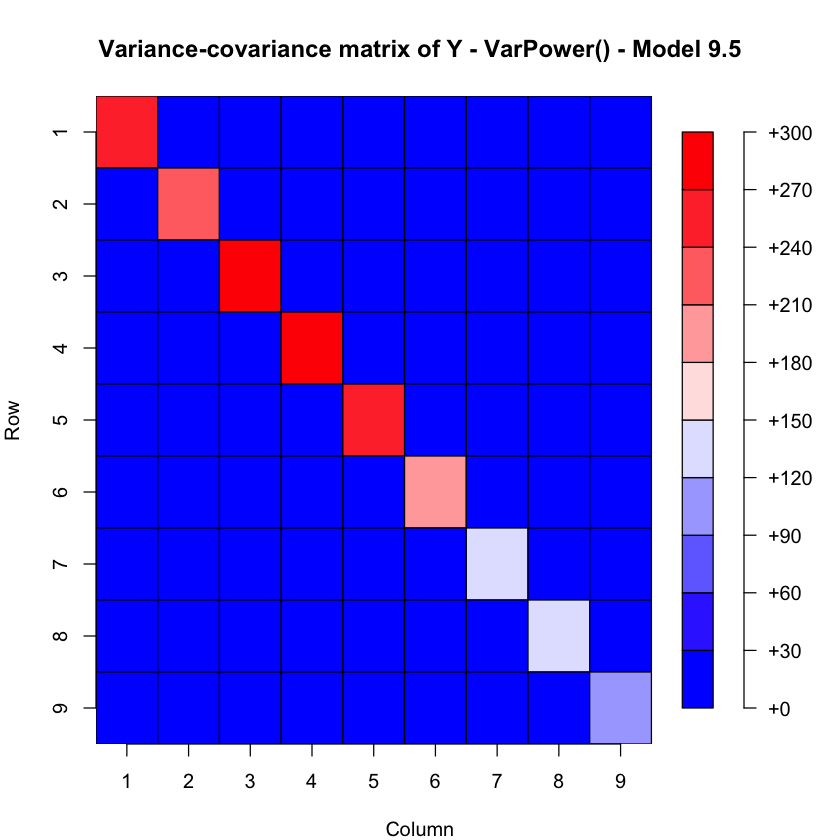

In [56]:
# Visualization of Variance-covariance matrix of Y (first 9 observations)
armd[1:9,] # 3 patients (3 "blocks": 11, 2222, 333)
par(mar = c(4,4,4,4))
plot(diag(x=0.2884781^2 * fitted(fm9.4)[1:9]^(1*2), nrow=9, ncol=9),
     col=colorRampPalette(c("blue", "white", "red"))(10),
     main='Variance-covariance matrix of Y - VarPower() - Model 9.5')
print(0.2884781^2 * fitted(fm9.4)[1:9]^(1*2))

In [57]:
###### Comparison between the models ######
anova(fm9.5, fm9.4)                        # fm9.5 nested in fm9.4 
# we are testing
# H0: if we assume a variance function in the form of a power function of the mean value, 
#     the power coefficient delta = 1 
#     (fm9.5)
# pval < 0.0001 --> reject the H0 (fm9.5) --> fm9.4 is more appropriate
# --> given that models fm9.4 and fm9.5 are both mean-variance models,
#     the inference on the implied variance structure, based on the result of the LR test, 
#     may need to be treated with caution (there are many unknowns)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
fm9.5,"gls(model = lm1.form, data = armd, weights = varPower(fixed = 1))",1,10,6965.943,7013.489,-3472.971,,NA,NA
fm9.4,"gls(model = lm1.form, data = armd, weights = varPower())",2,11,6823.102,6875.402,-3400.551,1 vs 2,144.8412,2.326377e-33


In [58]:
##### Comparison between the models: AIC #####

# we check the AIC
AIC(fm9.1, fm9.2, fm9.3,                  
    fm9.4, fm9.5)                         # Smaller AIC corresponds to a better fit
# model fm9.2 offers a better fit to the data than model fm9.4
anova(fm9.2, fm9.4)                       # anova() command for Non-nested models

# NB. anova() is actually able to recognise whether two models are nested
anova(fm9.1, fm9.2, fm9.3,                  
      fm9.4, fm9.5)   

# --> we assess the fit of the best model (9.2) using residual plots

,df,AIC
,<dbl>,<dbl>
fm9.1,13,6740.294
fm9.2,11,6738.126
fm9.3,12,6740.111
fm9.4,11,6823.102
fm9.5,10,6965.943


,call,Model,df,AIC,BIC,logLik
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
fm9.2,"gls(model = lm1.form, data = armd, weights = varPower(form = ~time))",1,11,6738.126,6790.427,-3358.063
fm9.4,"gls(model = lm1.form, data = armd, weights = varPower())",2,11,6823.102,6875.402,-3400.551


,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
fm9.1,"gls(model = lm1.form, data = armd, weights = varIdent(form = ~1 | time.f))",1,13,6740.294,6802.104,-3357.147,,NA,NA
fm9.2,"gls(model = lm1.form, data = armd, weights = varPower(form = ~time))",2,11,6738.126,6790.427,-3358.063,1 vs 2,1.8319853,4.001192e-01
fm9.3,"gls(model = lm1.form, data = armd, weights = varPower(form = ~time | treat.f))",3,12,6740.111,6797.166,-3358.055,2 vs 3,0.0155286,9.008293e-01
fm9.4,"gls(model = lm1.form, data = armd, weights = varPower())",4,11,6823.102,6875.402,-3400.551,3 vs 4,84.9910135,2.997242e-20
fm9.5,"gls(model = lm1.form, data = armd, weights = varPower(fixed = 1))",5,10,6965.943,7013.489,-3472.971,4 vs 5,144.8411934,2.326377e-33


In [62]:
##### Residual analysis #####

library(lattice) 

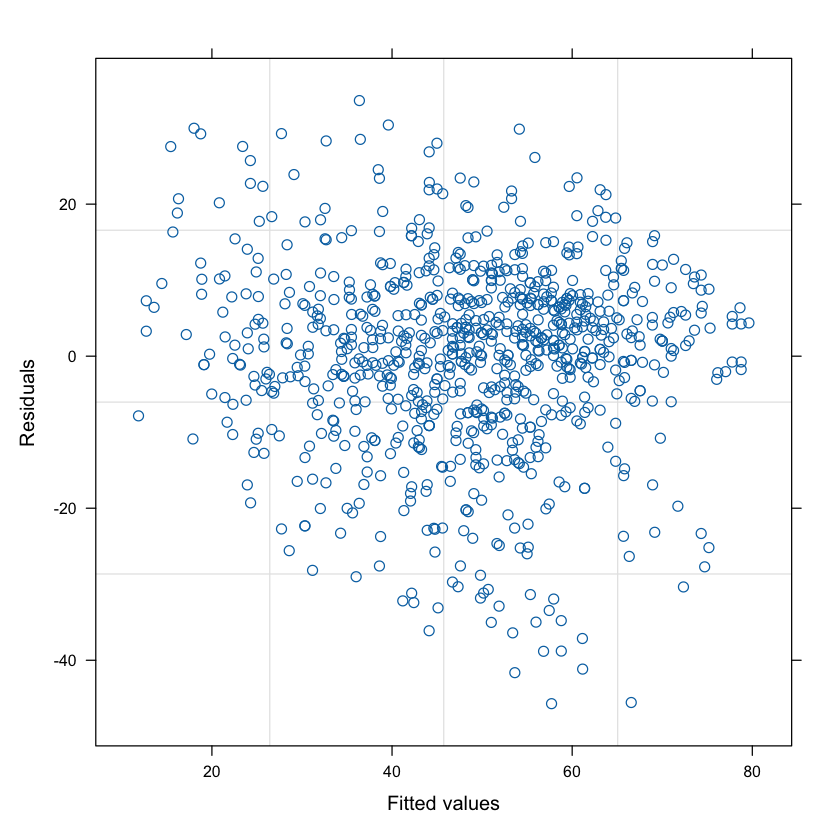

In [63]:
# Raw residuals 
plot(fm9.2, resid(., type = "response") ~ fitted(.))  # Raw residuals vs fitted
# We observe an asymmetric pattern, 
# with large positive (negative) residuals present mainly for small (large) fitted values.
# Our aim is to see no patterns at all in the residuals plot

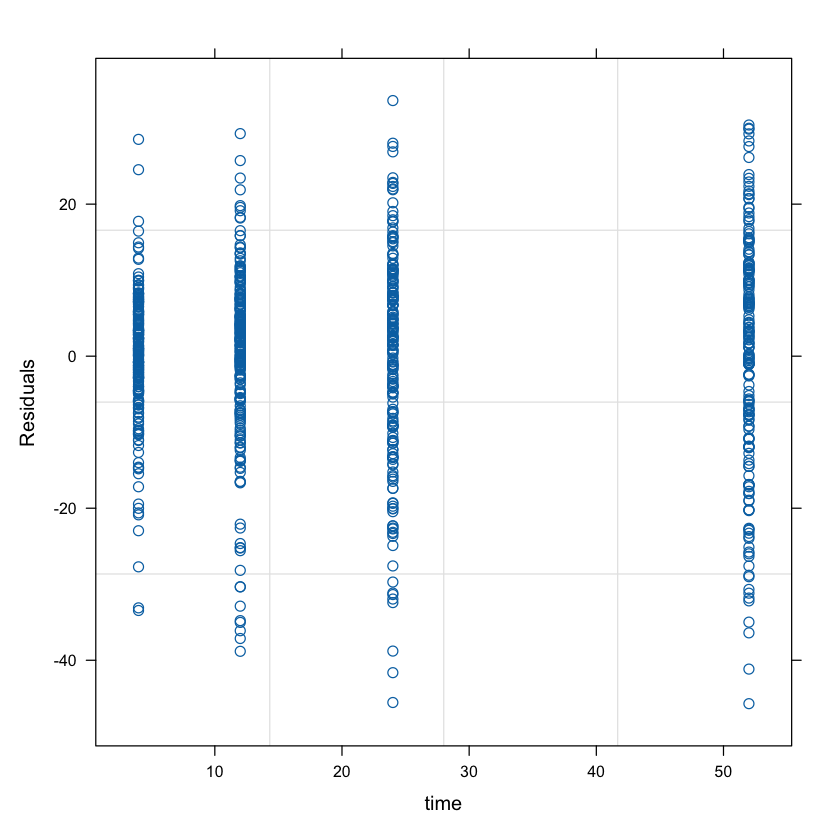

In [64]:
plot(fm9.2, resid(., type = "response") ~ time)       # Raw residuals vs time 

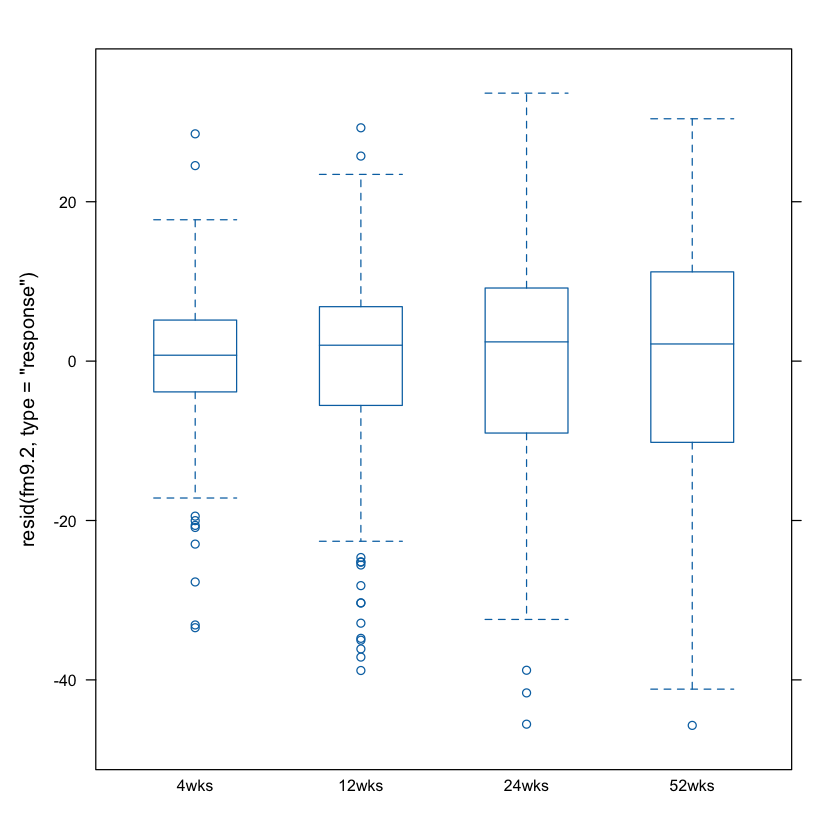

In [66]:
bwplot(resid(fm9.2, type='response') ~ time.f,        # Raw residuals vs time.f
       pch = "|", data = armd)                        
# The box-and-whiskers plots clearly show an increasing variance of the residuals.

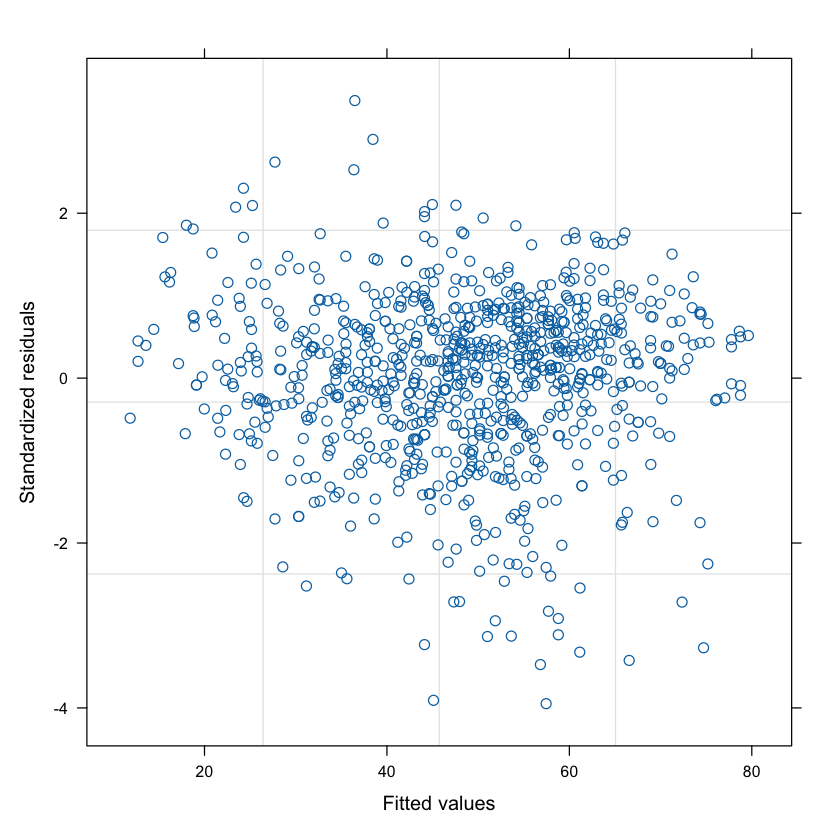

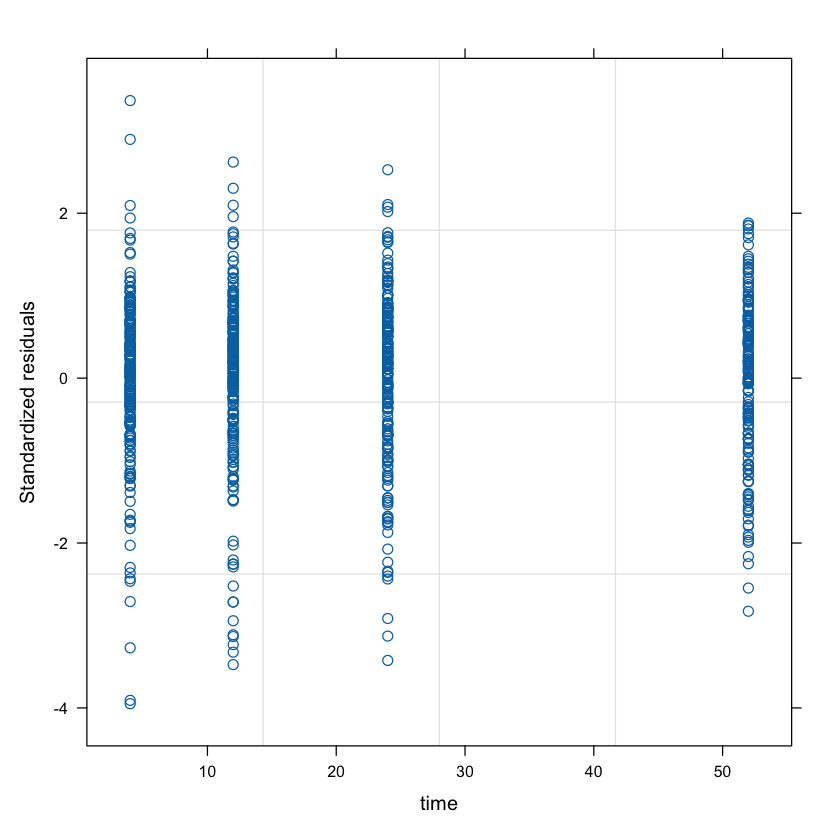

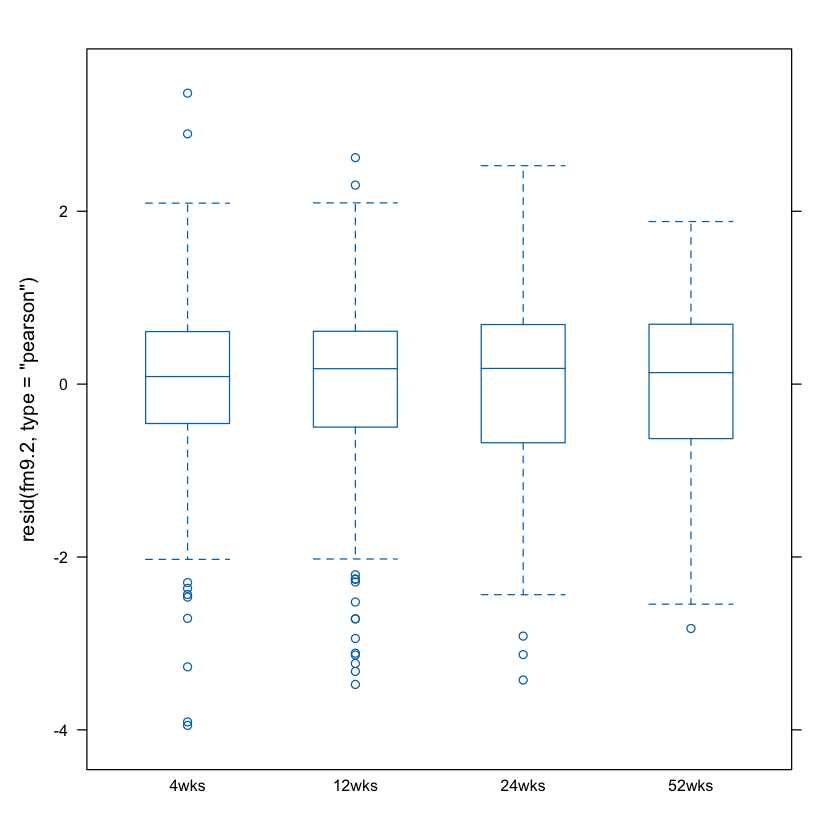

In [67]:
# Pearson residuals [ ^eps_i/sqrt(Var(y_i)) ]
# Pearson residuals are obtained from the raw residuals by dividing the latter by an
# estimate of the appropriate residual standard deviation, so they should be more homoscedastic

plot(fm9.2, resid(., type = "pearson" ) ~ fitted(.)) # Pearson vs fitted
# similarly to before, asymmetric pattern
plot(fm9.2, resid(., type = "pearson") ~ time)       # Pearson vs time 
bwplot( resid(fm9.2, type = "pearson") ~ time.f,     # Pearson vs time.f
        pch = "|", data = armd)
# thise plots illustrate the effect of scaling: 
# the variance of the residuals is virtually constant.

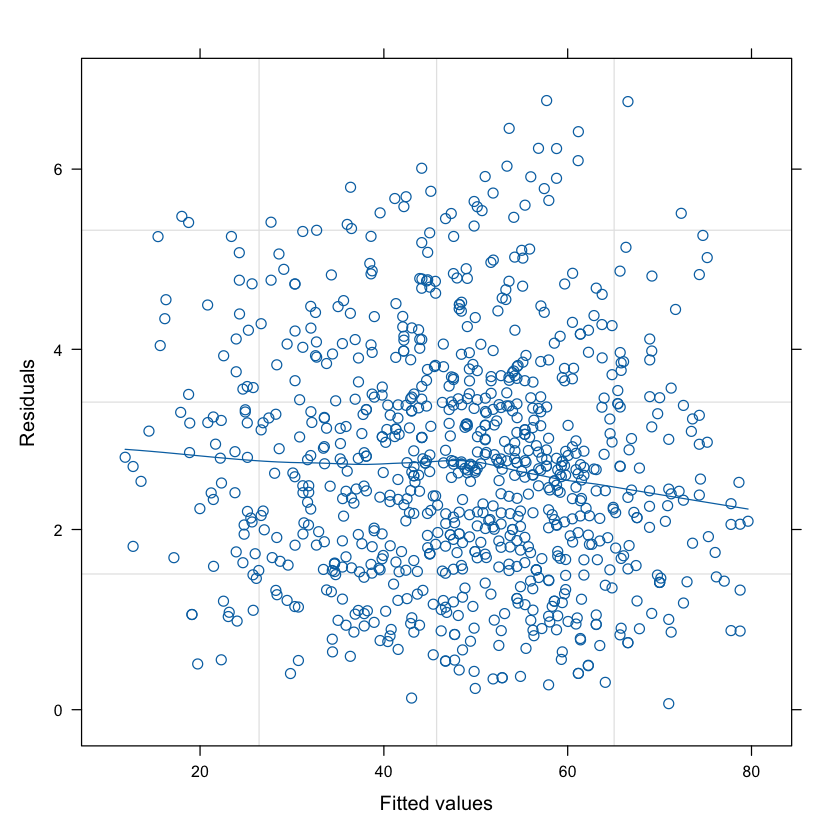

In [68]:
# Scale-location plots
# scale-location plots for the raw and Pearson residuals. 
# These are the scatterplots of the square-root transformation of the absolute
# value of the residuals versus fitted values. 
# --> The plots allow for detection of Patterns in the Residual Variance.

plot(fm9.2, sqrt(abs(resid(., type = "response"))) ~ fitted(.),
     type = c("p", "smooth"))
# there seems to be a dependence between the residual variance and the mean value. 
# However, this may be an artifact of the heteroscedasticity of the raw residuals

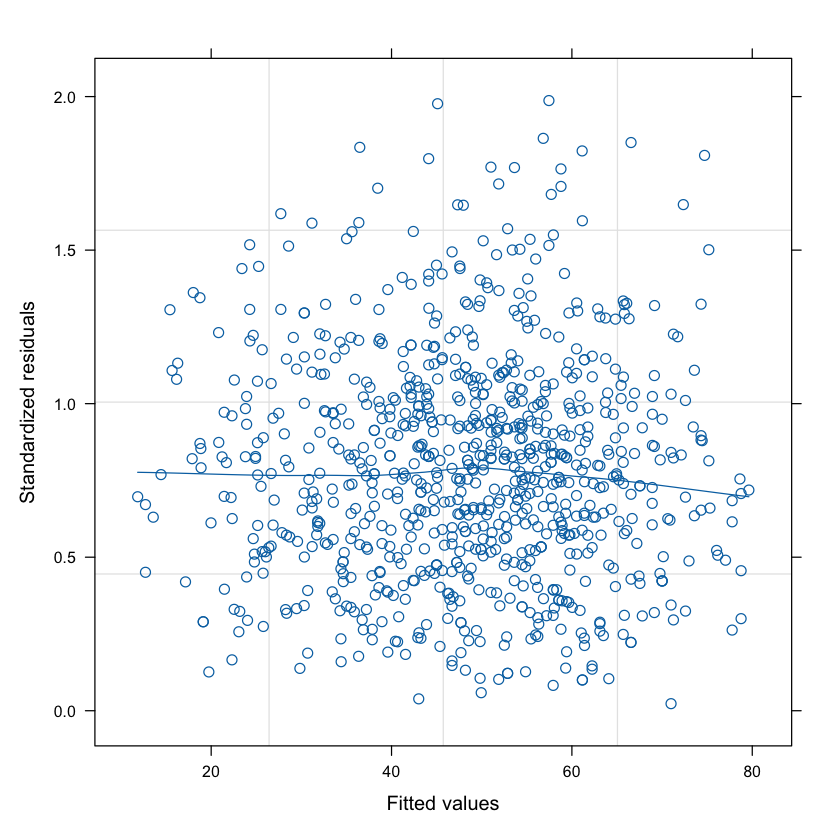

In [69]:

plot(fm9.2, sqrt(abs(resid(., type = "pearson"))) ~ fitted(.),
     type = c("p", "smooth"))
# does not indicate any clear trend in the residual variance


The downloaded binary packages are in
	/var/folders/2n/xc_5x6ys00q7kj5lcfn2s10r0000gn/T//Rtmp1jGMaC/downloaded_packages


,P4wks,P12wks,P24wks,P52wks
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.01610714,-0.67198118,NA,NA
2,1.17545016,0.65452340,0.7894075,0.42717705
3,-0.09364673,-0.25081720,-1.4546505,NA
4,-0.01088010,0.08041638,0.3265753,0.84990784
6,-0.21995158,-0.04553262,0.2766744,-0.05665674
7,0.76678598,1.20701711,1.1223547,0.82447147


[1] -3.948352  3.366335


Attaching package: 'ellipse'


The following object is masked from 'package:graphics':

    pairs




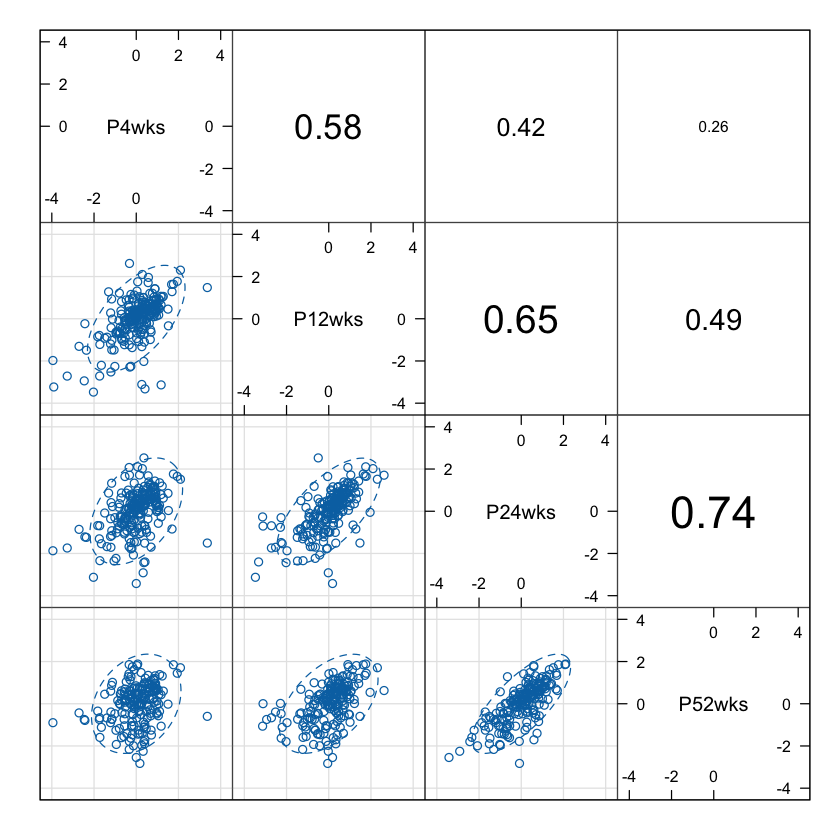

In [75]:
#### EXTRA material: NO NEED TO LEARN THIS CODE ####
install.packages('ellipse')

# We select data for 188 subjects with all four post-randomization visual acuity measurements. 
# Scatterplot matrix of the Pearson residuals for model fm9.2 for all four measurement occasions.
# (complete cases only, n = 188; correlation coefficients above the diagonal)
# We also plot the 95% confidence ellipses.

residP <- resid(fm9.2, type="p")
dtAux <- subset(armd, select = c(subject, visual, time, time.f, treat.f)) 
require(reshape)
dtP <- data.frame(dtAux, residP)
dtPm <- melt(dtP,
              measure.var=c("residP"),
              id.var = c("subject","time.f"))
dtPc <- cast(subject ~ time.f ~ variable, data = dtPm) # array
dtPc <- data.frame(dtPc) 
names(dtPc) <- c("P4wks","P12wks","P24wks","P52wks")
head(dtPc)
range(dtPc, na.rm=TRUE)

library(ellipse)
my.upperPanel <-                           ## pairwise.complete.obs 
  function(x, y, subscripts, ...){
    panel.xyplot(x, y, type = "n", ...)      # no plot
    ic <- complete.cases(cbind(x,y))
    mn <- c(mean(x[ic]), mean(y[ic]))
    covx <- var(cbind(x,y), use="complete.obs")
    # print(covx)
    # ex <- ellipse(covx)
    corrx <- cov2cor(covx)
    corx <- round(corrx[1,2], 2)
    abs.corx <- abs(corx)
    # print(corx)
    cex.value <- 3
    ltext(0, 0, corx, cex = abs.corx * cex.value)
  }

my.lowerPanel <-                          ## pairwise.complete.obs 
  function(x,y,subscripts,...){
    panel.grid(h = -1, v = -1)
    covx <- var(cbind(x, y), use = "complete.obs")
    # print(covx)
    ex <- ellipse(covx)
    panel.xyplot(ex[ ,1], ex[ ,2], lty = 2, type = "l", ...)
    panel.xyplot(x, y, ...)
  }


mySuperPanel <- function(z, subscripts, panel.subscripts,...){
  panel.pairs(z, subscripts = subscripts,
              panel.subscripts = panel.subscripts,
              as.matrix=TRUE, 
              upper.panel = "my.upperPanel",
              lower.panel = "my.lowerPanel",
              prepanel.limits = function(z) return(c(-4,4))
  )
}


splom.form <- formula(~cbind(P4wks,P12wks,P24wks,P52wks))
splom.object <- splom(splom.form,
                      data=dtPc,             #### subset(armd240,miss.pat =="----"),
                      as.matrix=TRUE,        #### varnames = abbrev.names, 
                      xlab="",
                      superpanel = mySuperPanel
)

print(splom.object)
rm(my.upperPanel,mySuperPanel,splom.object)

# The scatterplots clearly show a violation of the assumption 
# of the independence of observations: residuals for different measurements are correlated. 
# The correlation coefficient decreases with the increasing distance between the timepoints. 

# NB. Some caution is needed in interpreting the strength of correlation, 
# because the estimated residuals are correlated even if the independence assumption holds